In [1]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

In [2]:
# Load raw data
pph_raw = pd.read_csv('pay_per_hour/average_pph_male_female.csv')
# Load shape from file
df = gp.read_file("shapefiles/Com01012019_g_WGS84.shp")

In [3]:
average_pph = pph_raw[pph_raw['TIPO_DATO7'] == "HOUWAG_ENTEMP_MED_MI"]

toreplace = ['Verbano-Cusio-Ossola',"Valle d'Aosta / Vallée d'Aoste", 'Massa-Carrara','Forlì-Cesena',
            'Bolzano / Bozen','Pesaro e Urbino','Monza e della Brianza','Barletta-Andria-Trani','Sud Sardegna']

replacement = ['Domodossola',"Aosta",'Carrara','Cesena','Bolzano','Pesaro','Monza','Barletta','Iglesias']

average_pph['Territorio'].replace(toreplace, replacement,inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4]:
for i in df['COMUNE'].unique():
    if any(average_pph['Territorio'].values == i):
        current = average_pph[average_pph['Territorio'].values == i]
        prov = df[df['COMUNE'] == i].COD_PROV.values
        # TOTAL
        df.loc[df['COD_PROV'].values == prov,'TOTAL'] = current[current.SEXISTAT1 == 9].Value.values[0]
        # MALE
        df.loc[df['COD_PROV'].values == prov,'MALE'] = current[current.SEXISTAT1 == 1].Value.values[0]
        # FEMALE
        df.loc[df['COD_PROV'].values == prov,'FEMALE'] = current[current.SEXISTAT1 == 2].Value.values[0]
        # GAP(male-female)
        df.loc[df['COD_PROV'].values == prov,'GAP'] = current[current.SEXISTAT1 == 1].Value.values[0] - current[current.SEXISTAT1 == 2].Value.values[0]

In [5]:
# Define sixtiles to label categories

total_sixtiles = np.asarray(df['TOTAL'].quantile([0.33,0.66]))
gap_sixtiles = np.asarray(df['GAP'].quantile([0.33,0.66]))

In [6]:
# Label each datapoint according based on the sixtile
def set_interval_value(x, a, b):
    
    if x <= a: 
        return 0
    elif a < x <= b: 
        return 1
    else: 
        return 2

In [7]:
# Define color space (see https://benjaminbrooke.me/visualizations/bivariate-choropleth-color-generator/)

color_base =["#d9d9d9", "#bfd3ae", "#a3cd81", "#759fe1", "#679ab5", "#589686", "#0059eb", "#0057bd", "#00548c"]#["#ebebeb", "#b3e8ca", "#69e59f", "#96bceb", "#96bcca", "#69bc9f", "#3a88eb", "#3a88ca", "#3a889f"]

# Set color combination associated to the 9 labels leading to the following categories:

cat1 = [set_interval_value(v, gap_sixtiles[0], gap_sixtiles[1]) for v in df['GAP']]
cat2 = [set_interval_value(v, total_sixtiles[0], total_sixtiles[1]) for v in df['TOTAL']]

ids = [int(xc + len(np.unique(cat1))*yc) for xc, yc in zip(cat1,cat2)]
col = [color_base[i] for i in ids]
df['category'] = ids

ImportError: The descartes package is required for plotting polygons in geopandas.

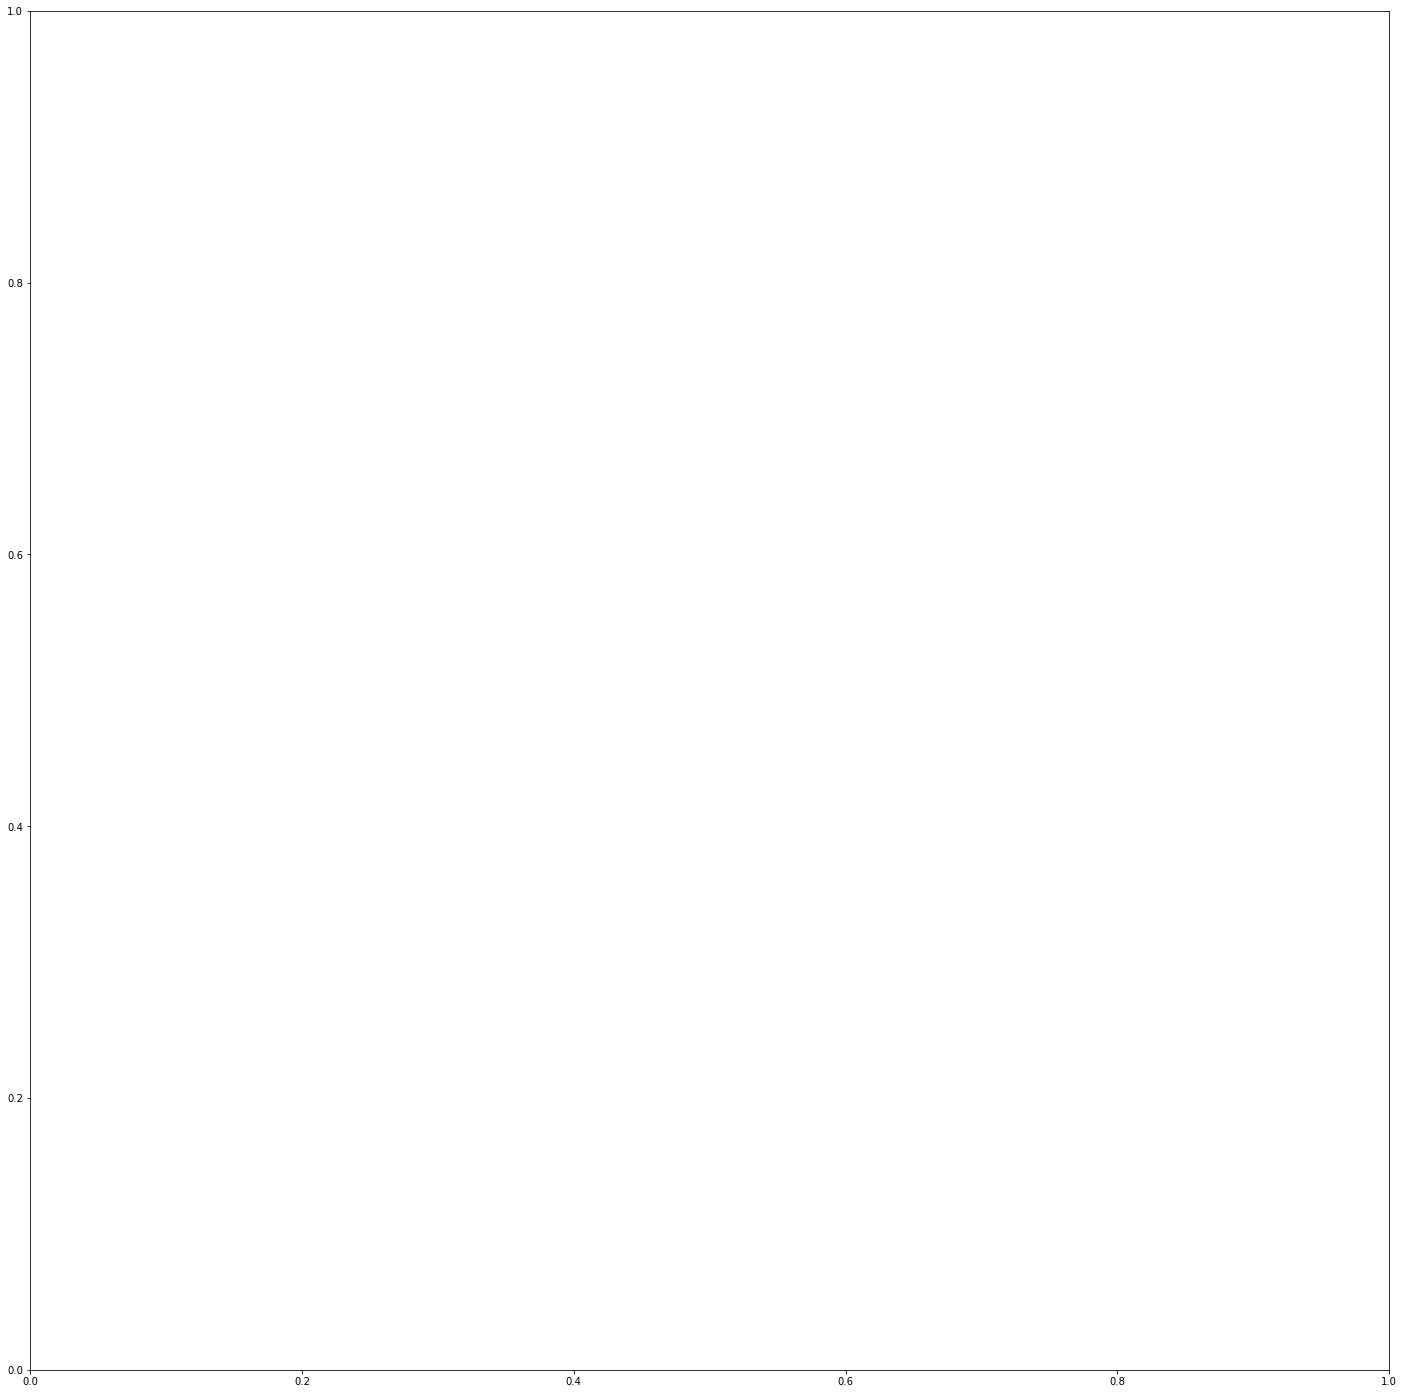

In [8]:
# Plotting

base = df.plot(figsize = (25, 25),color=None, edgecolor='Black')
plot = df.plot(ax=base,color=col, edgecolor='none')
plt.axis('off')
plt.axis('equal')
#fig = plot.get_figure()
#fig.savefig("Italy_GenderPayGap.png",dpi=300)

In [49]:
df.loc[df['COMUNE'].values == 'Rimini'].GAP.values.tolist()

[0.3899999999999988]